# Chaos PSO

## Implémentation des fonctions

### Imports des outils

In [279]:
# pour les graphes
from matplotlib import pyplot as plt

# pour les vecteurs
import numpy as np

# pour copier des vecteurs
from copy import deepcopy as dp

# pour les randomiseurs
import random as r

# pour générer p points de dimension D pour la population
from scipy.stats import qmc
from scipy.stats.qmc import LatinHypercube

### Implémentation de la fonction Ackley

In [280]:
# Ackley
def ackley(v):
    return -(20)*np.exp(-0.2*np.sqrt(0.5*(v[0]**2 + v[1]**2))) - np.exp(0.5*(np.cos(2*np.pi*v[0]) + np.cos(2*np.pi*v[1]))) + np.exp(1) + 20

### Implémentation de la fonction Rastrigin

In [281]:
# Rastrigin
def rastrigin(v):
    A = 10
    n = len(v)
    fx = A*n
    for i in range(0,n):
        fx += v[i]*v[i] - np.array(A*np.cos(2*np.pi*v[i]))
    return fx

### Implémentation de la logistic map (Chaos)

In [282]:
# Logistic Map
def logistic(Kmax):
    Xlg = np.zeros(Kmax)
    mu = 4. # mu = 4 => chaos
    Xlg[0] = 0.10
    for k in range(1,Kmax):
        Xlg[k] = mu*Xlg[k-1]*(1 - Xlg[k-1])
    return Xlg

### Implémentation algorithme PSO

In [283]:
def PSO(rk,J,D,p,a,b,K,wp,wg,graphe = True):
    
    #INITIALISATION
    r = rk(K)
    
    l_bounds = np.ones(D)*a
    u_bounds = np.ones(D)*b

    engine = LatinHypercube(d=D)
    P = qmc.scale(np.array(engine.random(n=p)), l_bounds, u_bounds)
    
    V = np.zeros((p,D))

    pb = dp(P)
    gb = pb[1]
    Jgb = np.zeros(K)
    
    #GRAPHE
    if(D == 2 and graphe):
        # plot de la fonction
        x = np.linspace(a, b, 100)
        y = np.linspace(a, b, 100)
        X, Y = np.meshgrid(x, y)

        Z = J(np.array([X,Y]))

        plt.pcolormesh(X, Y, Z, shading="gouraud")
        plt.colorbar()
        plt.plot(P[:,0],P[:,1], '.', color='r')
        plt.title("population à l'itération 0")
        plt.show()
    
    #BOUCLES
    for k in range(0,K):
        Jpb = np.zeros(p)
        for i in range(0,p):
            V[i] = 0.8*V[i] + r[k]*wp*(pb[i] - P[i]) + r[k]*wg*(gb - P[i]) 
            P[i] = P[i] + V[i]
            P[i] = np.minimum(u_bounds,np.maximum(P[i],l_bounds)) 
            if(J(P[i]) < J(pb[i])):
                pb[i] = P[i]
            Jpb[i] = J(pb[i])
        gb = pb[np.argmin(Jpb)]
        Jgb[k] = J(gb)
    
    return P,Jgb
    

## Tests de validation de PSO

### Test en dimension 2 avec Ackley

#### Plot de Ackley

Dans cette fonction, le minimum attendu est atteint en $gb = (0,0)$ pour $J(gb) = 0$. Cette fonction est viable seulement en dimension 2.

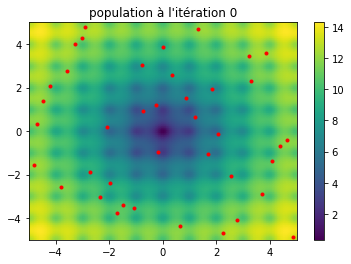

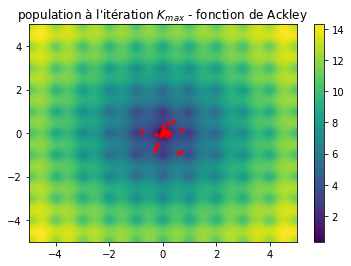

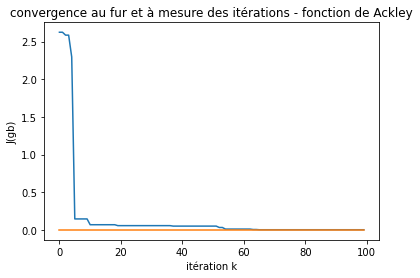

In [284]:
#INITIALISATION

# nombre d'itérations
Kmax = 100

#Dimension et taille de la population
D = 2
p = 40

# poids
wp = 0.7
wg = 0.7

#création des variables
k = np.arange(0,Kmax)
P, Jgb = PSO(logistic,ackley,D,p,-5,5,Kmax,wp,wg)

#création du meshgrid
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
    
#fonction Ackley
Z = ackley(np.array([X,Y]))
    
#affiche Ackley et la population finale
plt.pcolormesh(X, Y, Z, shading="gouraud")
plt.colorbar()
plt.plot(P[:,0],P[:,1], '.', color='r')
plt.title("population à l'itération $K_{max}$ - fonction de Ackley")
plt.show()

#affiche J(gb) en fonction des itérations puis affiche J(gb) optimal
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax))
plt.ylabel('J(gb)')
plt.xlabel('itération k')
plt.title('convergence au fur et à mesure des itérations - fonction de Ackley')
plt.show()

In [285]:
print(np.min(Jgb))

0.002401914106414438


Ici, on remarque que $J(gb)$ expérimental est quasiment égal à $0$.

### Test en dimension 2 avec Rastrigin

#### Plot Rastrigin

Dans cette fonction, le minimum attendu est atteint en $gb = (0,0)$ pour $J(gb) = 0$.

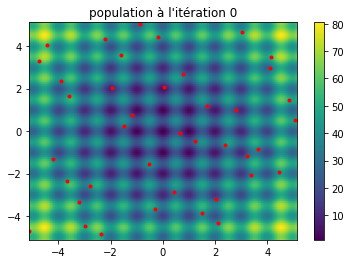

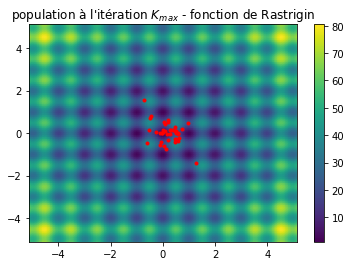

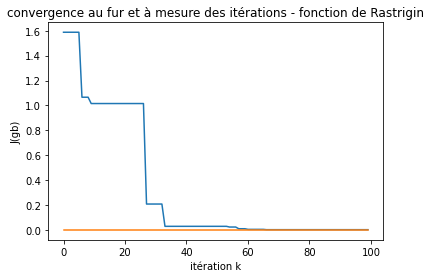

In [286]:
#INITIALISATION

# nombre d'itérations
Kmax = 100

#Dimension et taille de la population
D = 2
p = 40

# poids
wp = 0.7
wg = 0.7

#création des variables
k = np.arange(0,Kmax)
P, Jgb = PSO(logistic,rastrigin,D,p,-5.12,5.12,Kmax,wp,wg)

#création du meshgrid
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
    
#fonction Rastrigin
Z = rastrigin(np.array([X,Y]))
    
#affiche Rastrigin et la population finale
plt.pcolormesh(X, Y, Z, shading="gouraud")
plt.colorbar()
plt.plot(P[:,0],P[:,1], '.', color='r')
plt.title("population à l'itération $K_{max}$ - fonction de Rastrigin")
plt.show()

#affiche J(gb) en fonction des itérations puis affiche J(gb) optimal
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax))
plt.ylabel('J(gb)')
plt.xlabel('itération k')
plt.title('convergence au fur et à mesure des itérations - fonction de Rastrigin')
plt.show()

In [287]:
print(np.min(Jgb))

0.0019467820753398257


Ici, on remarque que $J(gb)$ expérimental s'approche de $0$, mais ne l'atteint pas car cette fonction possède des minimums locaux qui changent légèrement la valeur de $gb$. (Il est possible en fonction des conditions initiales que $J(gb)$ à l'état initial soit déjà très proche de $0$).

### Test en dimension 5 avec (Rastrigin)

#### Plot Rastrigin

Pour cette fonction, le minimum global attendu est atteint en $gb = (0,0,0,0,0)$ pour $J(gb) = 0$.

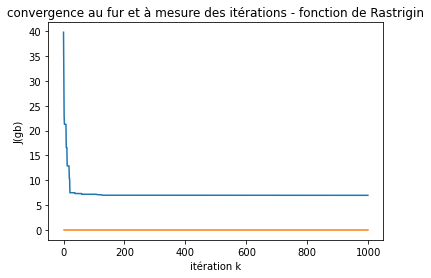

In [288]:
#INITIALISATION

# nombre d'itérations
Kmax = 1000

#Dimension et taille de la population
D = 5
p = 40

# poids
wp = 0.7
wg = 0.7

#création des variables
k = np.arange(0,Kmax)
P, Jgb = PSO(logistic,rastrigin,D,p,-5.12,5.12,Kmax,wp,wg)

#affiche J(gb) en fonction des itérations puis affiche J(gb) optimal
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax))
plt.ylabel('J(gb)')
plt.xlabel('itération k')
plt.title('convergence au fur et à mesure des itérations - fonction de Rastrigin')
plt.show()

In [289]:
print(np.min(Jgb))

6.964708361845506


Ici, on remarque que $J(gb)$ expérimental s'approche de $0$, mais ne l'atteint pas car cette fonction possède des minimums locaux qui changent légèrement la valeur de $gb$. De plus, en augmentant la dimension, l'algorithme devient de moins en moins précis.

## Etude paramétrique

### Etude de Ackley : dimension 2 

#### Modification de la population $P = 10, 20, 40, 80, 160, 320$

Text(0.5, 0.98, 'Influence de $p$ sur la convergence - fonction de Ackley')

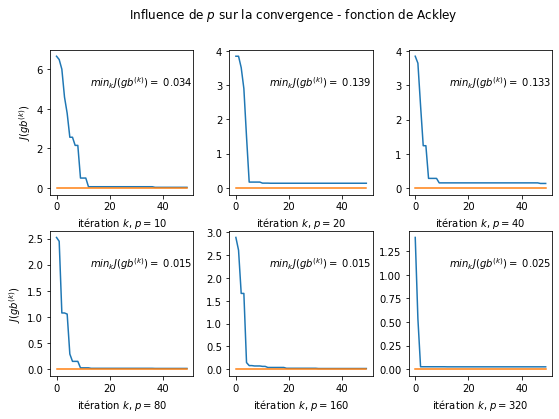

In [290]:
#INITIALISATION

# Valeurs possibles pour la population p
p_list = [10, 20, 40, 80, 160, 320]

# Kmax et Dimension (de l'espace des features) fixées
Kmax = 50
D = 2

# poids
wp = 0.7
wg = 0.7
    
#création des variables d'initialisation
k = np.arange(0,Kmax)

# Initialisation des plots

fig = plt.figure(figsize=(9, 6))
rows = 2
columns = 3
grid = plt.GridSpec(rows, columns, wspace = .25, hspace = .25)


#création des variables pour p = 10
P, Jgb = PSO(logistic,ackley,D,p_list[0],-5.12,5.12,Kmax,wp,wg,False)

plt.subplot(grid[0, 0])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax))
plt.text(Kmax/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.ylabel('$J(gb^{(k)})$')
plt.xlabel('itération $k$, $p = 10$')

#création des variables pour p = 20
P, Jgb = PSO(logistic,ackley,D,p_list[1],-5.12,5.12,Kmax,wp,wg,False)

plt.subplot(grid[0, 1])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax))
plt.text(Kmax/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.xlabel('itération $k$, $p = 20$')

#création des variables pour p = 40
P, Jgb = PSO(logistic,ackley,D,p_list[2],-5.12,5.12,Kmax,wp,wg,False)

plt.subplot(grid[0, 2])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax))
plt.text(Kmax/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.xlabel('itération $k$, $p = 40$')

#création des variables pour p = 80
P, Jgb = PSO(logistic,ackley,D,p_list[3],-5.12,5.12,Kmax,wp,wg,False)

plt.subplot(grid[1, 0])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax))
plt.text(Kmax/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.ylabel('$J(gb^{(k)})$')
plt.xlabel('itération $k$, $p = 80$')

#création des variables pour p = 160
P, Jgb = PSO(logistic,ackley,D,p_list[4],-5.12,5.12,Kmax,wp,wg,False)

plt.subplot(grid[1, 1])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax))
plt.text(Kmax/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.xlabel('itération $k$, $p = 160$')

#création des variables pour p = 320
P, Jgb = PSO(logistic,ackley,D,p_list[5],-5.12,5.12,Kmax,wp,wg,False)

plt.subplot(grid[1, 2])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax))
plt.text(Kmax/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.xlabel('itération $k$, $p = 320$')

plt.suptitle(r'Influence de $p$ sur la convergence - fonction de Ackley')

Ici, on remarque que pour la fonction Ackley, plus la population est grande, plus le global best convergera rapidement et précisément.

#### Variation du nombre d'itérations $K_{max} = 10, 50, 100, 500, 1000$

Text(0.5, 0.98, 'Influence de $K_{max}$ sur la convergence - fonction de Ackley')

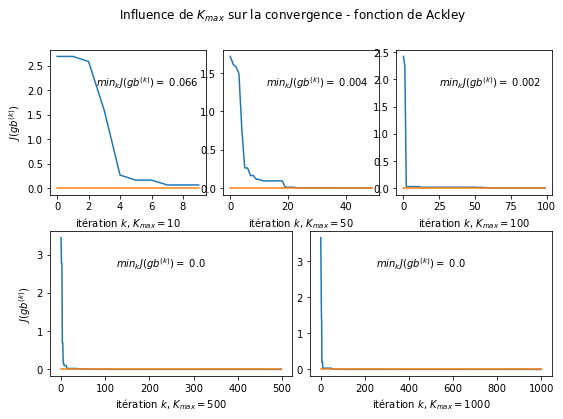

In [291]:
# TEST POUR CHAQUE KMAX

# Valeurs possibles pour Kmax
Kmax_list = [10, 50, 100, 500, 1000]

# Dimension et taille de la population fixées 
D = 5
p = 80

# Initialisation des plots

fig = plt.figure(figsize=(9, 6))
rows = 2
columns = 6
grid = plt.GridSpec(rows, columns, wspace = .25, hspace = .25)


#création des variables pour Kmax = 10
k = np.arange(0,Kmax_list[0])
P, Jgb = PSO(logistic,ackley,D,p,-5,5,Kmax_list[0],wp,wg,False)

plt.subplot(grid[0, 0:2])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax_list[0]))
(np.min(Jgb))*np.ones(Kmax_list[0])
plt.ylabel(r'$J(gb^{(k)})$')
plt.text(Kmax_list[0]/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.xlabel(r'itération $k$, $K_{max} = 10$')

#création des variables pour Kmax = 50
k = np.arange(0,Kmax_list[1])
P, Jgb = PSO(logistic,ackley,D,p,-5,5,Kmax_list[1],wp,wg,False)

plt.subplot(grid[0, 2:4])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax_list[1]))
(np.min(Jgb))*np.ones(Kmax_list[1])
#plt.ylabel('J(gb)')
plt.text(Kmax_list[1]/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.xlabel(r'itération $k$, $K_{max} = 50$')

#création des variables pour Kmax = 100
k = np.arange(0,Kmax_list[2])
P, Jgb = PSO(logistic,ackley,D,p,-5,5,Kmax_list[2],wp,wg,False)

plt.subplot(grid[0, 4:6])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax_list[2]))
(np.min(Jgb))*np.ones(Kmax_list[2])
#plt.ylabel('J(gb)')
plt.text(Kmax_list[2]/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.xlabel(r'itération $k$, $K_{max} = 100$')

#création des variables pour Kmax = 500
k = np.arange(0,Kmax_list[3])
P, Jgb = PSO(logistic,ackley,D,p,-5,5,Kmax_list[3],wp,wg,False)

plt.subplot(grid[1, 0:3])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax_list[3]))
plt.ylabel(r'$J(gb^{(k)})$')
plt.text(Kmax_list[3]/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.xlabel(r'itération $k$, $K_{max} = 500$')

#création des variables pour Kmax = 1000
k = np.arange(0,Kmax_list[4])
P, Jgb = PSO(logistic,ackley,D,p,-5,5,Kmax_list[4],wp,wg,False)

plt.subplot(grid[1, 3:6])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax_list[4]))
#plt.plot(k, (np.min(Jgb))*np.ones(Kmax_list[4]))
#plt.ylabel('J(gb)')
plt.text(Kmax_list[4]/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.xlabel(r'itération $k$, $K_{max} = 1000$')


plt.suptitle(r'Influence de $K_{max}$ sur la convergence - fonction de Ackley')

Sur ces graphes, on peut observer que la fonction Ackley converge très rapidement à $K \simeq 50$ où le global best optimal est quasiment atteint. Il n'est donc pas utile de faire plus de 100 itérations pour cette fonction.

## Etude paramétrique

### Etude de Rastrigin : dimension $D > 2$ possible

#### Variation de la population $P = 10, 20, 40, 80, 160, 320$

Text(0.5, 0.98, 'Influence de $p$ sur la convergence - fonction de Rastrigin')

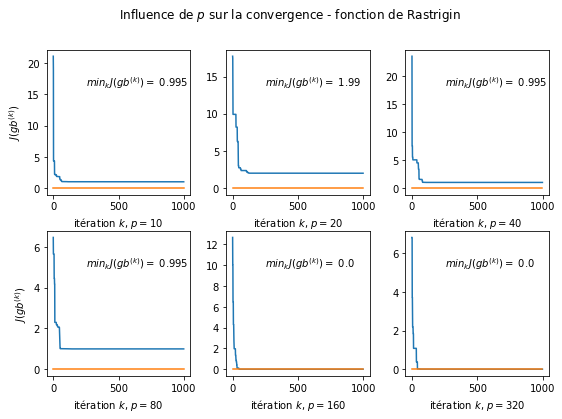

In [292]:
#INITIALISATION

# Valeurs possibles pour la population p
p_list = [10, 20, 40, 80, 160, 320]

# Kmax et Dimension (de l'espace des features) fixées
Kmax = 1000
D = 3

# poids
wp = 0.7
wg = 0.7

#création des variables d'initialisation
k = np.arange(0,Kmax)

# Initialisation des plots

fig = plt.figure(figsize=(9, 6))
rows = 2
columns = 3
grid = plt.GridSpec(rows, columns, wspace = .25, hspace = .25)


#création des variables pour p = 10
P, Jgb = PSO(logistic,rastrigin,D,p_list[0],-5.12,5.12,Kmax,wp,wg,False)

plt.subplot(grid[0, 0])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax))
plt.text(Kmax/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.ylabel('$J(gb^{(k)})$')
plt.xlabel('itération $k$, $p = 10$')

#création des variables pour p = 20
P, Jgb = PSO(logistic,rastrigin,D,p_list[1],-5.12,5.12,Kmax,wp,wg,False)

plt.subplot(grid[0, 1])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax))
plt.text(Kmax/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.xlabel('itération $k$, $p = 20$')

#création des variables pour p = 40
P, Jgb = PSO(logistic,rastrigin,D,p_list[2],-5.12,5.12,Kmax,wp,wg,False)

plt.subplot(grid[0, 2])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax))
plt.text(Kmax/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.xlabel('itération $k$, $p = 40$')

#création des variables pour p = 80
P, Jgb = PSO(logistic,rastrigin,D,p_list[3],-5.12,5.12,Kmax,wp,wg,False)

plt.subplot(grid[1, 0])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax))
plt.text(Kmax/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.ylabel('$J(gb^{(k)})$')
plt.xlabel('itération $k$, $p = 80$')

#création des variables pour p = 160
P, Jgb = PSO(logistic,rastrigin,D,p_list[4],-5.12,5.12,Kmax,wp,wg,False)

plt.subplot(grid[1, 1])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax))
plt.text(Kmax/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.xlabel('itération $k$, $p = 160$')

#création des variables pour p = 320
P, Jgb = PSO(logistic,rastrigin,D,p_list[5],-5.12,5.12,Kmax,wp,wg,False)

plt.subplot(grid[1, 2])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax))
plt.text(Kmax/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.xlabel('itération $k$, $p = 320$')

plt.suptitle(r'Influence de $p$ sur la convergence - fonction de Rastrigin')

Pour la fonction Rastrigin, le volume de la population joue un rôle important dans la mesure où, plus la population est grande plus la population aura tendance à converger vers le minimum global et non vers un minimum local.

#### Variation du nombre d'itérations $K_{max} = 10, 50, 100, 500, 1000$

Text(0.5, 0.98, 'Influence de $K_{max}$ sur la convergence - fonction de Rastrigin')

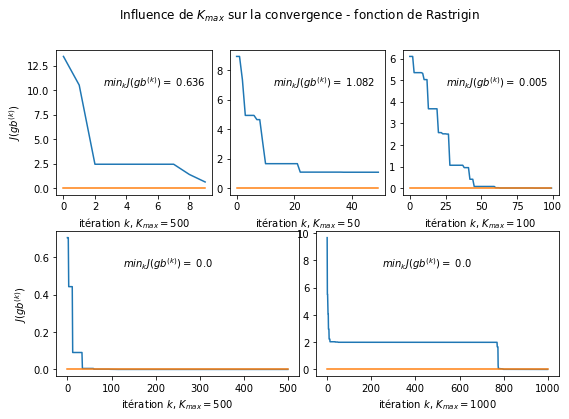

In [293]:
# TEST POUR CHAQUE KMAX

# Valeurs possibles pour Kmax
Kmax_list = [10, 50, 100, 500, 1000]

# Dimension et taille de la population fixées 
D = 3
p = 160

# Initialisation des plots

fig = plt.figure(figsize=(9, 6))
rows = 2
columns = 6
grid = plt.GridSpec(rows, columns, wspace = .25, hspace = .25)


#création des variables pour Kmax = 10
k = np.arange(0,Kmax_list[0])
P, Jgb = PSO(logistic,rastrigin,D,p,-5.12,5.12,Kmax_list[0],wp,wg,False)

plt.subplot(grid[0, 0:2])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax_list[0]))
(np.min(Jgb))*np.ones(Kmax_list[0])
plt.ylabel(r'$J(gb^{(k)})$')
plt.text(Kmax_list[0]/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.xlabel(r'itération $k$, $K_{max} = 500$')

#création des variables pour Kmax = 50
k = np.arange(0,Kmax_list[1])
P, Jgb = PSO(logistic,rastrigin,D,p,-5.12,5.12,Kmax_list[1],wp,wg,False)

plt.subplot(grid[0, 2:4])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax_list[1]))
(np.min(Jgb))*np.ones(Kmax_list[1])
#plt.ylabel('J(gb)')
plt.text(Kmax_list[1]/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.xlabel(r'itération $k$, $K_{max} = 50$')

#création des variables pour Kmax = 100
k = np.arange(0,Kmax_list[2])
P, Jgb = PSO(logistic,rastrigin,D,p,-5.12,5.12,Kmax_list[2],wp,wg,False)

plt.subplot(grid[0, 4:6])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax_list[2]))
(np.min(Jgb))*np.ones(Kmax_list[2])
#plt.ylabel('J(gb)')
plt.text(Kmax_list[2]/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.xlabel(r'itération $k$, $K_{max} = 100$')

#création des variables pour Kmax = 500
k = np.arange(0,Kmax_list[3])
P, Jgb = PSO(logistic,rastrigin,D,p,-5.12,5.12,Kmax_list[3],wp,wg,False)

plt.subplot(grid[1, 0:3])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax_list[3]))
plt.ylabel(r'$J(gb^{(k)})$')
plt.text(Kmax_list[3]/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.xlabel(r'itération $k$, $K_{max} = 500$')

#création des variables pour Kmax = 1000
k = np.arange(0,Kmax_list[4])
P, Jgb = PSO(logistic,rastrigin,D,p,-5.12,5.12,Kmax_list[4],wp,wg,False)

plt.subplot(grid[1, 3:6])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax_list[4]))
#plt.plot(k, (np.min(Jgb))*np.ones(Kmax_list[4]))
#plt.ylabel('J(gb)')
plt.text(Kmax_list[4]/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.xlabel(r'itération $k$, $K_{max} = 1000$')

plt.suptitle(r'Influence de $K_{max}$ sur la convergence - fonction de Rastrigin')

Pour la fonction Rastrigin, le nombre d'itérations joue un rôle crucial car cette fonction possède beaucoup de minimums locaux (cf. graphe de Rastrigin en dimension 2). C'est pour cela que pour un nombre d'itération faible, le global best sera très peu précis (même si c'est possible d'obtenir une convergence rapide en fonction des conditions initiales). Il est donc recommandé de faire un nombre assez élevé d'itérations pour avoir un résultat le plus précis possible.

#### Variation de la dimension $D = 2, 5, 10, 50, 100$

Text(0.5, 0.98, 'Influence de $D$ sur la convergence - fonction de Rastrigin')

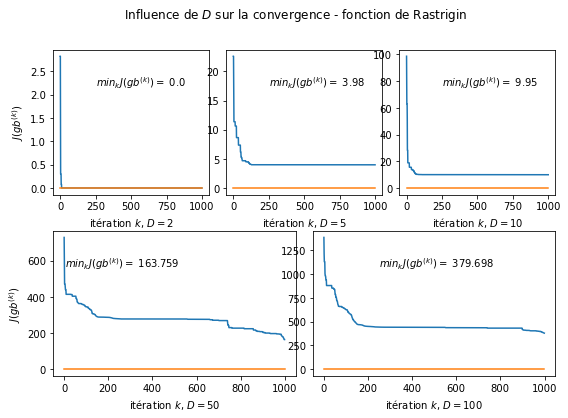

In [294]:
#INITIALISATION

# Valeurs possibles pour la dimension de l'espace des features
D_list = [2, 5, 10, 50, 100]

# Kmax et p fixées
Kmax = 1000
p = 160

# poids
wp = 0.7
wg = 0.7

#création des variables d'initialisation
k = np.arange(0,Kmax)

# Initialisation des plots

fig = plt.figure(figsize=(9, 6))
rows = 2
columns = 6
grid = plt.GridSpec(rows, columns, wspace = .25, hspace = .25)

#création des variables pour D = 2
k = np.arange(0,Kmax)
P, Jgb = PSO(logistic,rastrigin,D_list[0],p,-5.12,5.12,Kmax,wp,wg,False)

plt.subplot(grid[0, 0:2])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax))
plt.text(Kmax/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.ylabel('$J(gb^{(k)})$')
plt.xlabel('itération $k$, $D = 2$')

#création des variables pour D = 5
k = np.arange(0,Kmax)
P, Jgb = PSO(logistic,rastrigin,D_list[1],p,-5.12,5.12,Kmax,wp,wg,False)

plt.subplot(grid[0, 2:4])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax))
plt.text(Kmax/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
#plt.ylabel('J(gb)')
plt.xlabel('itération $k$, $D = 5$')

#création des variables pour D = 10
k = np.arange(0,Kmax)
P, Jgb = PSO(logistic,rastrigin,D_list[2],p,-5.12,5.12,Kmax,wp,wg,False)

plt.subplot(grid[0, 4:6])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax))
plt.text(Kmax/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
#plt.ylabel('J(gb)')
plt.xlabel('itération $k$, $D = 10$')

#création des variables pour D = 50
k = np.arange(0,Kmax)
P, Jgb = PSO(logistic,rastrigin,D_list[3],p,-5.12,5.12,Kmax,wp,wg,False)

plt.subplot(grid[1, 0:3])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax))
plt.text(Kmax_list[0]/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
plt.ylabel('$J(gb^{(k)})$')
plt.xlabel('itération $k$, $D = 50$')

#création des variables pour D = 100
k = np.arange(0,Kmax)
P, Jgb = PSO(logistic,rastrigin,D_list[4],p,-5.12,5.12,Kmax,wp,wg,False)

plt.subplot(grid[1, 3:6])
plt.plot(k, Jgb)
plt.plot(k, np.zeros(Kmax))
plt.text(Kmax/4, 0.8*Jgb[0], r'$min_kJ(gb^{(k)}) = $ ' + str(round(np.min(Jgb), 3)),  verticalalignment='center' )
#plt.ylabel('J(gb)')
plt.xlabel(r'itération $k$, $D = 100$')
plt.suptitle(r'Influence de $D$ sur la convergence - fonction de Rastrigin')

Comme prévu, plus la dimension augmente, plus l'erreur est élevée car les méthodes d'optimisation probabiliste ne sont pas très efficaces en dimension élevée.